Files loaded successfully!

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America 

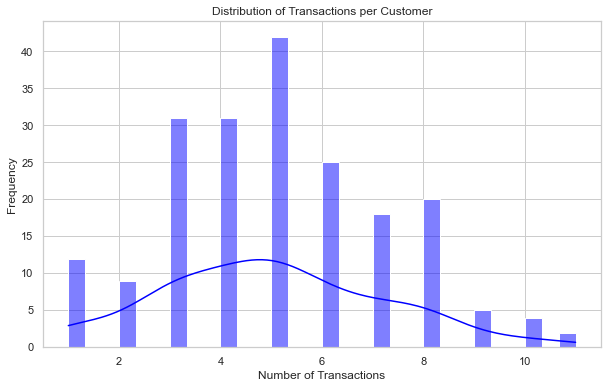


Revenue by Customer:
count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: Revenue, dtype: float64


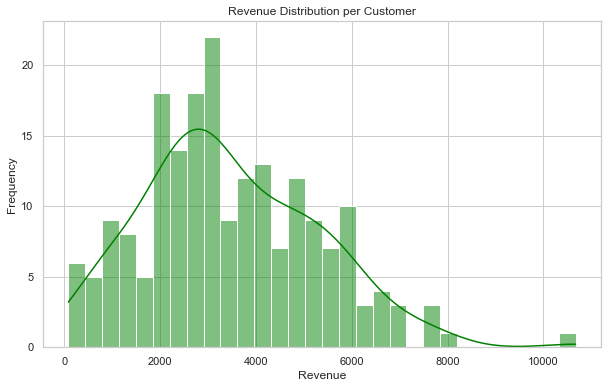


Top 10 Products by Sales Volume:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


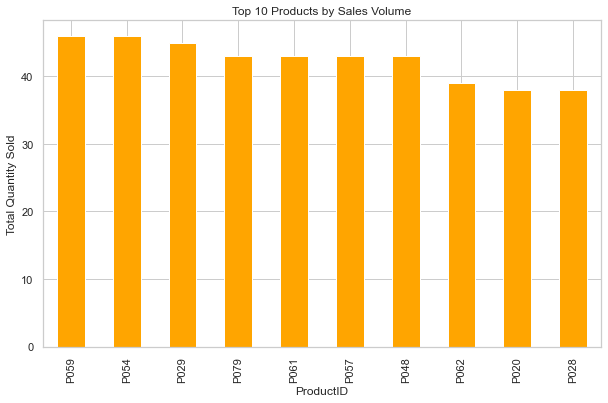


Average Spending per Transaction:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: Revenue, dtype: float64


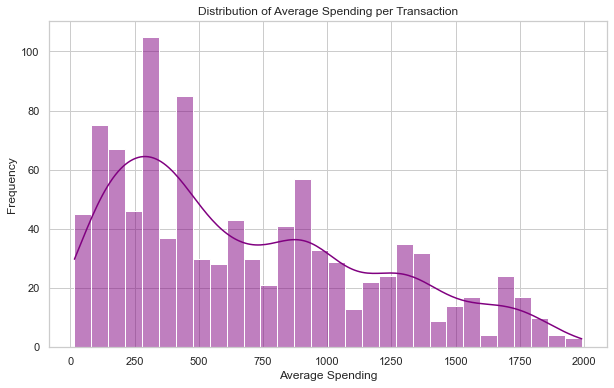


Monthly Revenue Trend:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: Revenue, dtype: float64


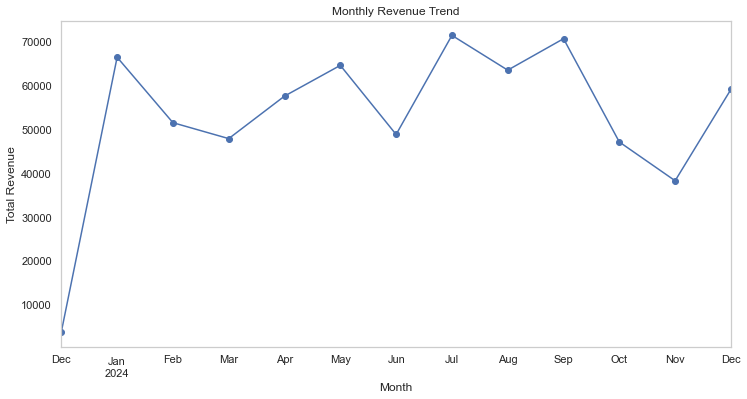

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = "Details"
customers_file = os.path.join(folder_path, "Customers.csv")
products_file = os.path.join(folder_path, "Products.csv")
transactions_file = os.path.join(folder_path, "Transactions.csv")

try:
    customers_df = pd.read_csv(customers_file)
    products_df = pd.read_csv(products_file)
    transactions_df = pd.read_csv(transactions_file)
    print("Files loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

print("\nCustomers Dataset Overview:")
print(customers_df.info())
print(customers_df.describe())
print(customers_df.head())

print("\nProducts Dataset Overview:")
print(products_df.info())
print(products_df.describe())
print(products_df.head())

print("\nTransactions Dataset Overview:")
print(transactions_df.info())
print(transactions_df.describe())
print(transactions_df.head())

merged_df = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")
print("\nMerged Dataset Overview:")
print(merged_df.info())
print(merged_df.head())

customer_transactions = merged_df.groupby("CustomerID").size()
print("\nTransactions per Customer:")
print(customer_transactions.describe())

plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, kde=True, bins=30, color='blue')
plt.title("Distribution of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.show()

merged_df["Revenue"] = merged_df["Quantity"] * merged_df["Price_y"]
revenue_by_customer = merged_df.groupby("CustomerID")["Revenue"].sum()
print("\nRevenue by Customer:")
print(revenue_by_customer.describe())

plt.figure(figsize=(10, 6))
sns.histplot(revenue_by_customer, kde=True, bins=30, color='green')
plt.title("Revenue Distribution per Customer")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

product_sales = merged_df.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False)
print("\nTop 10 Products by Sales Volume:")
print(product_sales.head(10))

product_sales.head(10).plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("ProductID")
plt.ylabel("Total Quantity Sold")
plt.show()

avg_transaction_value = merged_df.groupby("TransactionID")["Revenue"].mean()
print("\nAverage Spending per Transaction:")
print(avg_transaction_value.describe())

plt.figure(figsize=(10, 6))
sns.histplot(avg_transaction_value, kde=True, bins=30, color='purple')
plt.title("Distribution of Average Spending per Transaction")
plt.xlabel("Average Spending")
plt.ylabel("Frequency")
plt.show()

merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby("Month")["Revenue"].sum()

print("\nMonthly Revenue Trend:")
print(monthly_revenue)

monthly_revenue.plot(figsize=(12, 6), marker='o', linestyle='-')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()
